1.2532418085611319 2.745502230882486


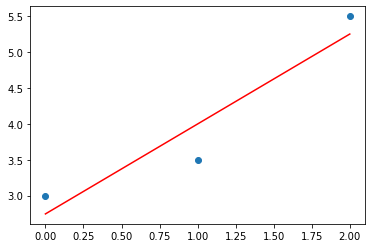

In [3]:
# 선형 회귀 실습_01

import numpy as np
import matplotlib.pyplot as plt

X = np.array([0.0, 1.0, 2.0])
y = np.array([3.0, 3.5, 5.5])

w = 0 # 기울기
b = 0 # 절편

lrate = 0.01 # 학습률
epochs = 1000 # 반복 횟수

n = float(len(X)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
    y_pred = w * X + b # 선형 회귀 예측값
    dw = (2/n) * sum(X * (y_pred-y)) # 넘파이 배열간의 산술 계산은 요소별로 적용
    db = (2/n) * sum(y_pred-y) # sum()은 모든 요소들의 합을 계산하는 내장 함수
    w = w -lrate * dw # 기울기 수정
    b = b - lrate * db # 절편 수정

# 기울기와 절편을 출력한다.
print(w, b)

# 예측값을 만든다.
y_pred = w * X + b

# 입력 데이터를 그래프 상에 찍는다.
plt.scatter(X, y)

# 예측값은 선그래프로 그린다.
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()

iteration   0: loss 17.17 w 0.10 b 0.08 
iteration  50: loss 0.61 w 1.73 b 1.71 
iteration 100: loss 0.33 w 1.73 b 2.05 
iteration 150: loss 0.24 w 1.63 b 2.23 
iteration 200: loss 0.19 w 1.53 b 2.36 
iteration 250: loss 0.16 w 1.47 b 2.45 
iteration 300: loss 0.15 w 1.41 b 2.52 
iteration 350: loss 0.14 w 1.37 b 2.58 
iteration 400: loss 0.13 w 1.34 b 2.62 
iteration 450: loss 0.13 w 1.32 b 2.65 
########## final w, b 1.3033228991130752 2.6760184293088694


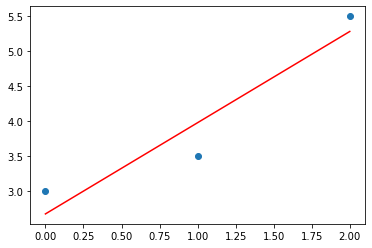

In [5]:
# 선형 회귀 실습_02

import numpy as np
import matplotlib.pyplot as plt

def mse(y, y_hat):
    return ((y-y_hat)**2).mean()

def mse_val(y, predict_result):
    return mse(np.array(y), np.array(predict_result))

X = np.array([0.0, 1.0, 2.0])
y = np.array([3.0, 3.5, 5.5])

w = 0 # 기울기
b = 0 # 절편

lrate = 0.01 # 학습률
epochs = 500 # 반복 횟수

n = float(len(X)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
    y_pred = w*X + b # 선형 회귀 예측값
    dw = (2/n) * sum(X * (y_pred-y)) # 넘파이 배열간의 산술 계산은 요소별로 적용
    db = (2/n) * sum(y_pred-y) # sum()은 모든 요소들의 합을 계산하는 내장 함수
    w = w -lrate * dw # 기울기 수정
    b = b - lrate * db # 절편 수정
    if(i%50 == 0):
        print("iteration %3d: loss %4.2f w %3.2f b %3.2f "%(i, mse(y, y_pred), w, b))

# 기울기와 절편을 출력한다.
print('#'*10, 'final w, b {0} {1}'.format(w, b))

# 예측값을 만든다.
y_pred = w*X + b

# 입력 데이터를 그래프 상에 찍는다.
y_pred = w*X + b

# 입력 데이터를 그래프 상에 찍는다.
plt.scatter(X, y)

# 예측값은 선그래프로 그린다.
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()

[1.25]
2.7500000000000004
0.8928571428571429
[9.]


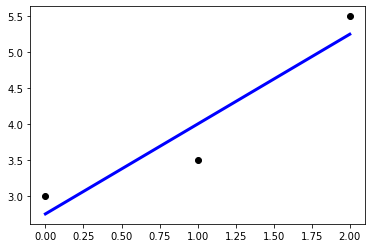

In [6]:
# 선형회귀 실습_03

import matplotlib.pylab as plt
from sklearn import linear_model

# 선형 회귀 모델을 생성한다.
reg = linear_model.LinearRegression()

# 데이터는 파이썬의 리스트로 만들어도 되고 아니면 넘파이의 배열로 만들어도 된다.
X = [[0], [1], [2]]  # 반드시 2차원으로 만들어야함.
y = [3, 3.5, 5.5]  # y = x + 3

# 학습 진행
reg.fit(X, y)

print(reg.coef_) # 직선의 기울기
print(reg.intercept_) # 직선의 y-절편
print(reg.score(X, y))

print(reg.predict([[5]]))

# 학습 데이터와 y 값을 산포도로 그린다.
plt.scatter(X, y, color='black')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(X)

# 학습 데이터와 예측값으로 선그래프로 그린다.
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다.
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

(442, 10)
(442, 1)


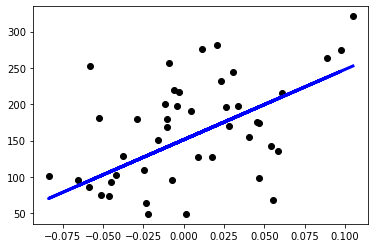

In [7]:
# 선형 회귀 예제 실습_04 - 당뇨병 예제

# BMI와 혈당간의 관계 예측

import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# 당뇨병 데이터 세트를 적재한다.
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print(diabetes_X.data.shape)
# 하나의 특징(BMI)만 추려내서 2차원 배열로 만든다. BMI 특징의 인덱스가 2이다.
diabetes_X_new = diabetes_X[:, np.newaxis, 2]
print(diabetes_X_new.data.shape)

# 학습 데이터와 테스트 데이터를 분리한다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new, diabetes_y, test_size=0.1, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# 테스트 데이터로 예측해보자.
y_pred = regr.predict(X_test)

# 실제 데이터와 예측 데이터를 비교해보자.
# plt.plot(y_test, y_ptre, '.')

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

X= 7.199999999999999 loss 27.639999999999993
X= 5.52 loss 16.350399999999997
X= 4.512 loss 12.286143999999998
X= 3.9071999999999996 loss 10.82301184
X= 3.54432 loss 10.2962842624
X= 3.3265919999999998 loss 10.106662334464
X= 3.1959551999999998 loss 10.03839844040704
X= 3.11757312 loss 10.013823438546535
X= 3.070543872 loss 10.004976437876753
X= 3.0423263232 loss 10.001791517635631
X= 3.02539579392 loss 10.000644946348826
X= 3.015237476352 loss 10.000232180685577
X= 3.0091424858112 loss 10.000083585046807
X= 3.00548549148672 loss 10.000030090616852
X= 3.003291294892032 loss 10.000010832622067
X= 3.0019747769352194 loss 10.000003899743945
X= 3.0011848661611316 loss 10.00000140390782
X= 3.000710919696679 loss 10.000000505406815
X= 3.0004265518180073 loss 10.000000181946453
X= 3.0002559310908046 loss 10.000000065500723
X= 3.0001535586544827 loss 10.00000002358026
X= 3.0000921351926895 loss 10.000000008488893
X= 3.0000552811156136 loss 10.000000003056002
X= 3.000033168669368 loss 10.0000000

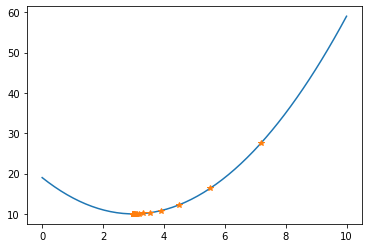

In [10]:
# 경사 하강법 실습_01

import numpy as np
import matplotlib.pyplot as plt

x = 10
learning_rate = 0.2
precision = 0.00001
max_iterations = 100
    
# 손실함수를 람다식으로 정의한다. loss_func = lambda x: (x-3)**2 + 10
loss_func = lambda x: (x-3)**2 + 10

# 그래디언트를 람다식으로 정의한다. 손실함수의 1차 미분값이다. gradient = lambda x: 2*x-6
gradient = lambda x: 2*x - 6

list1 = []
list2 = []

# 그래디언트 강하법
for i in range(max_iterations):
    x = x - learning_rate * gradient(x)
    list1.append(x)
    list2.append(loss_func(x))
    print("X=", x, "loss", loss_func(x))
    
print("최소값 = ", x)

x1 = np.linspace(0.0, 10.0)
y1 = loss_func(x1)
fig, ax = plt.subplots() # Create a figure containing a single axes.
ax.plot(x1,y1) # Plot some data on the axes.
ax.plot(list1,list2, '*') # Plot some data on the axes.

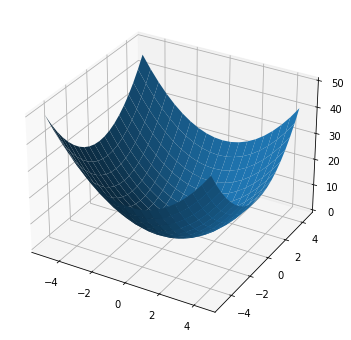

In [11]:
# 경사 하강법 실습_02

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y) # 참고 박스
Z = X**2 + Y**2 # 넘파이 연산

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# 3차원 그래프를 그린다.
ax.plot_surface(X, Y, Z)
plt.show()

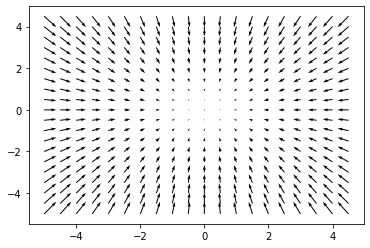

In [12]:
# 경사 하강법 실습_03

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
U = -2*X
V = -2*Y

plt.figure()
Q = plt.quiver(X, Y, U, V, units='width')
plt.show()

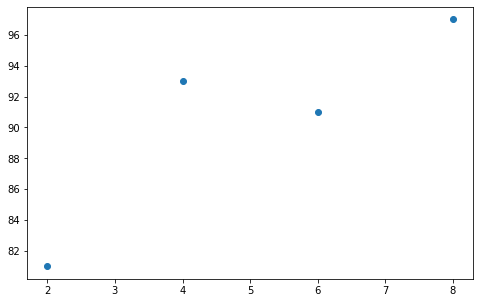

epoch=9, 기울기=14.0791, 절편=8.5049
epoch=109, 기울기=7.5338, 절편=47.7672
epoch=209, 기울기=4.6190, 절편=65.1612
epoch=309, 기울기=3.3275, 절편=72.8683
epoch=409, 기울기=2.7553, 절편=76.2831
epoch=509, 기울기=2.5017, 절편=77.7962
epoch=609, 기울기=2.3894, 절편=78.4666
epoch=709, 기울기=2.3396, 절편=78.7637
epoch=809, 기울기=2.3175, 절편=78.8953
epoch=909, 기울기=2.3078, 절편=78.9536
epoch=1009, 기울기=2.3034, 절편=78.9794
epoch=1109, 기울기=2.3015, 절편=78.9909
epoch=1209, 기울기=2.3007, 절편=78.9960
epoch=1309, 기울기=2.3003, 절편=78.9982
epoch=1409, 기울기=2.3001, 절편=78.9992
epoch=1509, 기울기=2.3001, 절편=78.9996
epoch=1609, 기울기=2.3000, 절편=78.9998
epoch=1709, 기울기=2.3000, 절편=78.9999
epoch=1809, 기울기=2.3000, 절편=79.0000
epoch=1909, 기울기=2.3000, 절편=79.0000


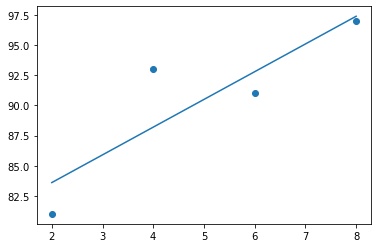

In [13]:
# 경사 하강법 실습_04

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부 시간 X와 성적 Y의 리스트 만들기.
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# 그래프로 나타내기
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.show()

# 리스트로 되어 있는 x와 y 값을 넘파이 배열로 바꾸기(인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함)
x_data = np.array(x)
y_data = np.array(y)

# 기울기 a와 절편 b의 값 초기화
a = 0
b = 0

# 학습률
lrate = 0.05

# 반복 횟수
epochs = 2001

# 경사 하강법
for i in range(epochs): # 에포스 수만큼 반복
    y_pred = a*x_data + b # y를 구하는 식
    error = y_data - y_pred # 오차를 구하는 식
    
    a_diff = -(1/len(x_data)) * sum(x_data * (error)) # 오차 함수를 a로 미분한 값
    b_diff = -(1/len(x_data)) * sum(y_data - y_pred) # 오차 함수를 b로 미분한 값
    
    a = a - lrate * a_diff # 학습률을 곱해 기존의 a값 업데이트
    b = b - lrate * b_diff # 학습률을 곱해 기존의 b값 업데이트
    
    if i % 100 == 9:
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        
# 앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()